In [231]:
import pandas as pd 
import numpy as np

## Read in Training and Test datasets
df1 = pd.read_csv('/Users/afarinnava/Desktop/Python Machine Learning/ML_HW2/optdigits.tra', header = None) 
df2 = pd.read_csv('/Users/afarinnava/Desktop/Python Machine Learning/ML_HW2/optdigits.tes', header = None) 

# Subset of train dataset
df_train = df1.iloc[:, 0:64]

# Store the target value
classes = df1.iloc[:, 64]  
classesTest = df2.iloc[:, 64]

# Drop columns with all zeros 0 and 39
df_train.drop([df_train.columns[0] , df_train.columns[39]] ,  axis='columns', inplace = True)

X = df_train
y = classes

# Subset of test dataset
df_test = df2.iloc[:, 0:64]
# Drop columns with all zeros 0, 32 and 39
df_test.drop([df_test.columns[0] , df_test.columns[32], df_test.columns[39]] ,  axis='columns', inplace = True) 
Xtest = df_test
# Convert dataframe into list
data_train = df_train.values.tolist() 

data_test = df_test.values.tolist() 

dataList = [data_train, data_test]



In [232]:
###################################################################################################
# Question 1- K-Means Clustering
# Implement the k-means clustering algorithm yourself in python. 
# Cluster the training set k=10 and k=20 clusters. 
#Run your clustering algorithm 10 times and report the reconstruction errors on 
# training and test datasets for each run and for each value of k=10 and k=20 (number of clusters). 
###################################################################################################
import random
import numpy as np
#from scipy.spatial import distance

## Randomly place the centroids of the three clusters 
for data in dataList:
    if (data == data_train):
        print('Reporting Train_data:\n')
    else:
        print('\nReporting Test_data:\n')
    
    ks = [10, 20]
    for k in ks:
        # Centroids list
        mi = []
        #create a sample of random instances as the index of centroids datapoints
        random_sample = random.sample(range(0, len(data)),k)
        # Initialize mi as the list of k centroids with random datapoints
        for i in random_sample:
            mi.append(data[i]) 
        mi = np.asarray(mi)
        # Iterate 10 times throuth the algorithm
        times = 1
        while(times <= 10):
            indexes = []
            #Create an empty list of k cluster
            cluster = [[] for _ in range(k)]
            # Initialize Reconstruction error
            rec_error = 0
            # Cluster each datapoint
            for point in data:
                dist = []
                pt = np.array(point)
                # Find the Eucledian distance between all points and the centroid
                for n in mi:
                    dist.append(np.linalg.norm(pt - n))
                # Find the index of minimum distance
                min_dist = min(dist)
                idx = dist.index(min_dist)
                indexes.append(idx)
                # Calculate the Reconstruction Error
                rec_error += min_dist**2 
                # Assign the point's index to the cluster with minimum distance
                cluster[idx].append(point)

            cl = np.array(cluster)
            for n in range(k):
                mi[n] = np.mean(cl[n], axis = 0)

            print("k= ", k, "iteration = ", times, " rec_Error = ", rec_error)    

            times += 1
    

Reporting Train_data:

k=  10 iteration =  1  rec_Error =  4787294.0
k=  10 iteration =  2  rec_Error =  2950265.0
k=  10 iteration =  3  rec_Error =  2799783.0
k=  10 iteration =  4  rec_Error =  2710562.0
k=  10 iteration =  5  rec_Error =  2643142.0
k=  10 iteration =  6  rec_Error =  2609183.0
k=  10 iteration =  7  rec_Error =  2600030.0
k=  10 iteration =  8  rec_Error =  2590436.0
k=  10 iteration =  9  rec_Error =  2585849.0
k=  10 iteration =  10  rec_Error =  2572583.0
k=  20 iteration =  1  rec_Error =  4075001.0
k=  20 iteration =  2  rec_Error =  2444125.0
k=  20 iteration =  3  rec_Error =  2287615.0
k=  20 iteration =  4  rec_Error =  2221635.0
k=  20 iteration =  5  rec_Error =  2177782.0
k=  20 iteration =  6  rec_Error =  2158181.0
k=  20 iteration =  7  rec_Error =  2143048.0
k=  20 iteration =  8  rec_Error =  2132945.0
k=  20 iteration =  9  rec_Error =  2126433.0
k=  20 iteration =  10  rec_Error =  2122606.0

Reporting Test_data:

k=  10 iteration =  1  rec_Error

nine:  813.4873985405163 %:  67.54663055561905


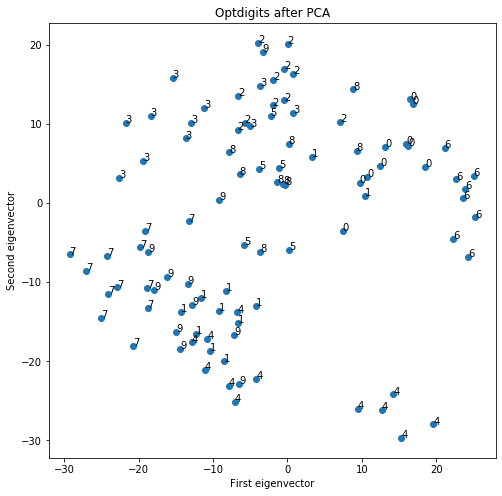

In [234]:
#########################################################################
# Question 2- PCA (Principal Component Analysis) algorithm
# Implement PCA (Principal Component Analysis) algorithm yourself. 
# Reduce the dimensionality of the training set by means of computing 
# the parameters required by PCA on the training set. 
# Display the training set using the first two projected dimensions 
# of the dataset and compare with the plot in the textbook.
#########################################################################
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import matplotlib.pyplot as plt
# training set
A = np.array(data_train)
# calculate the mean of each column
M = mean(A, axis=0)

# center columns by subtracting column means
C = A - M

# calculate covariance matrix of centered matrix
V = cov(C.T)

# eigendecomposition of covariance matrix
values, vectors = eig(V)

value_sums = sum(values)
#print('Explained Variance')
#for i,j in enumerate(values):
    #print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j/value_sums).real))

nine = sum(values[0:8])

print("nine: ", nine, "%: ", (nine*100/value_sums).real)

P = vectors.T.dot(C.T)

# Graph the projected data
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(P.T[0:100,0], P.T[0:100,1])

for i, txt in enumerate(classes[0:100]):
    ax.annotate(txt, (P.T[i,0], P.T[i,1]))
    
plt.title('Optdigits after PCA')
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')

plt.show()

Explained Variance
eigenvalue 1: 26.39%
eigenvalue 2: 20.62%
eigenvalue 3: 16.38%
eigenvalue 4: 11.44%
eigenvalue 5: 9.92%
eigenvalue 6: 5.80%
eigenvalue 7: 4.77%
eigenvalue 8: 2.80%
eigenvalue 9: 1.89%
nine:  (25.807394002983756+0j) %:  98.11277963827345


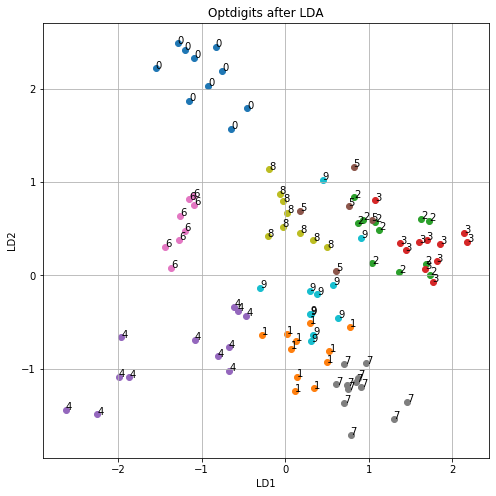

In [235]:
###############################################################################
# Question 3- LDA (Linear Discriminant Analysis)
# Implement LDA (Linear Discriminant Analysis) algorithm yourself. 
# Reduce the dimensionality of the training set by means of computing 
# the parameters required by LDA on the training set. Display the training
# set using the first two projected dimensions of the dataset and 
# compare with the plot in the textbook.
##############################################################################
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Store the target value 
df = df_train.join(pd.Series(classes, name = 'class'))

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Within Class Scatter Matrix
#### Create a vector with the means of each feature
class_feature_means = pd.DataFrame(columns= labels)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
##class_feature_means = df.mean(axis = 0)
class_feature_means = class_feature_means.iloc[0:62,:]


## Plug the mean vectors (mi) into the equation to obtain the within class scatter matrix
within_class_scatter_matrix = np.zeros((62,62))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((62,62))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(62,1), class_feature_means[c].values.reshape(62,1)
        s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
    
## Between Class Scatter Matrix
feature_means = df.mean()
feature_means = feature_means.iloc[0:62]
between_class_scatter_matrix = np.zeros((62,62))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    mc, m = class_feature_means[c].values.reshape(62,1), feature_means.values.reshape(62,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
    
### Solve the generalized eigenvalue problem to obtain the linear discriminants
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
### Sort the eigenvalues and select the first k eigenvectors
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

## Express it as a percentage
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i,j in enumerate(pairs[0:9]):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigen_value_sums).real))

nine = sum(eigen_values[0:8])

print("nine: ", nine, "%: ", (nine*100/eigen_value_sums).real)
    
## Create a matrix W with the first K eigenvectors
w_matrix = np.hstack((pairs[0][1].reshape(62,1), pairs[1][1].reshape(62,1), pairs[2][1].reshape(62,1),
                     pairs[3][1].reshape(62,1), pairs[4][1].reshape(62,1), pairs[5][1].reshape(62,1),
                     pairs[6][1].reshape(62,1), pairs[7][1].reshape(62,1), pairs[1][1].reshape(62,1))).real

### Save the dot product of X and W into a new matrix X_lda. 
## X_lda is composed of the LDA components,i.e. the new feature space
X_lda = np.array(df_train.dot(w_matrix))

## Encode every class as a number so that we can incorporate the class labels into our plot
y = classes

## plot the data as a function of the two LDA components and use a different color for each class
####fig, ax = plt.subplots(figsize=(5,5))
####ax.scatter(X_lda[0:100,0], X_lda[0:100,1])
from matplotlib import pyplot as plt

###ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(8,8))
for label in labels:
    plt.scatter(x=X_lda[0:100,0].real[y[0:100] == label],
            y=X_lda[0:100,1].real[y[0:100] == label],
            label=labels[label]
            )

for i, txt in enumerate(y[0:100]):
    ax.annotate(txt, (X_lda[i,0], X_lda[i,1]))
plt.title('Optdigits after LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.grid()
plt.tight_layout
plt.show()

### I could not figure out what the problem with my code is 
### my results are labeled different from the textbook graph.
### I would like to know how I can fix this, please!
### Thank you :)


k =  3 
Confusion Matrix:
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   1   0   1   0]
 [  0   4 173   0   0   0   0   0   0   0]
 [  0   0   0 181   0   0   0   1   1   0]
 [  0   2   0   0 178   0   0   0   1   0]
 [  0   0   0   1   1 179   0   0   0   1]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 172   1   6]
 [  0   9   0   1   0   0   0   0 162   2]
 [  0   0   0   4   0   1   0   0   1 174]]
Testing Error of KNN:  2.17 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.92      0.99      0.95       182
           2       1.00      0.98      0.99       177
           3       0.97      0.99      0.98       183
           4       0.99      0.98      0.99       181
           5       0.99      0.98      0.99       182
           6       0.99      1.00      1.00       181
           7       0.99      0.96      0.98       179
           8       0.97  

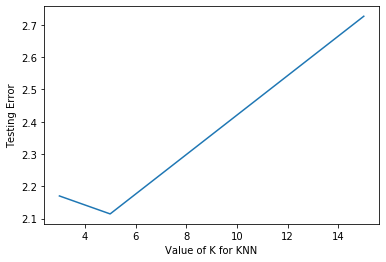

In [236]:
#########################################################################################
# Question 4- (use a library) Use knn (k nearest neighbor) classification algorithm
# with k=3, 5, 15 to predict the class labels (0, 1, 2, …, 9) for the original
# test set (in 64 dimensions) using the original training set as the training dataset.
# Compute the confusion matrix and also the test error for each 
# class (0, 1, 2, ….,9) on the test dataset. 
#########################################################################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

neighbors = [3, 5, 15]
df_train = df1.iloc[:, 0:64]

# Subset of test dataset
df_test = df2.iloc[:, 0:64]

# Store the target value
classes = df1.iloc[:, 64]  
classesTest = df2.iloc[:, 64]

# empty list that will hold error of running KNN with a different each k
scores = []

for i in neighbors:
    # empty list that will hold cv scores
    cv_scores = []
    
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(df_train, classes)

    y_pred = knn.predict(df_test)

    #confusion matrix
    conf = confusion_matrix(classesTest, y_pred)

    scores.append((1-metrics.accuracy_score(classesTest, y_pred))*100)
    print("k = ", i, "\nConfusion Matrix:\n", conf)
    
    answer = (1-metrics.accuracy_score(classesTest, y_pred))*100
    print("Testing Error of KNN: ",str(round(answer, 3)), "%")
    
    print(classification_report(classesTest, y_pred))
    
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing error
plt.plot(neighbors, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')

print("The minimum error belongs to k = 5")
print('-----"The error for each class is 1- precision"---')

k =  5 Dimensions =  2 
Confusion Matrix:
 [[  2  22   0   0 152   0   2   0   0   0]
 [ 26  10  74   2   0  30   0   0  27  13]
 [  1   6  27  68   1  14   0   5  38  17]
 [  0  16   3  55   3   5   0  84   4  13]
 [ 48   0   5   3   1   0 124   0   0   0]
 [ 14  51  23   8   3  25   0  13  37   8]
 [ 18   4   0   0  76   1  82   0   0   0]
 [ 10   0  89  37   0  14   0   0  10  19]
 [ 14  19  29   9   0  45   0   3  46   9]
 [  4  50   7   2   2   7   0  82  15  11]]
Testing Error of KNN:  85.587 %
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       178
           1       0.06      0.05      0.06       182
           2       0.11      0.15      0.12       177
           3       0.30      0.30      0.30       183
           4       0.00      0.01      0.00       181
           5       0.18      0.14      0.15       182
           6       0.39      0.45      0.42       181
           7       0.00      0.00      0.00       179
       

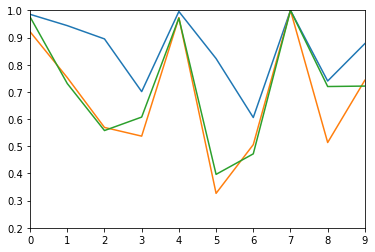


PCA has helped with classes 2, 5, and 8 the most.




In [249]:
####################################################################################################
# Question 5- Repeat Q4) but use 
# Q5a) PCA projected test set (PCA parameters computed on the training set) in 2, 5, 9 dimensions. 
# Q5b) LDA projected test set (LDA parameters computed on the training set) in 2, 5, 9 dimensions. 
# Q5c) Does using PCA or LDA help with the test error of the knn? 
# If so, for which classes does it help most? 
####################################################################################################
from sklearn.metrics import precision_score

# PCA projected test set:
# test set
AB = np.array(data_test)
# calculate the mean of each column
MB = mean(AB, axis=0)

# center columns by subtracting column means
CB = AB - MB

# calculate covariance matrix of centered matrix
VB = cov(CB.T)

# eigendecomposition of covariance matrix
valuesB, vectorsB = eig(VB)

PB = vectorsB.T.dot(CB.T)

# diemnsions of PCA projection
dimension = [2, 5, 9]

# using k = 5, since it created the least error in previous question
neighbors = [5]
for j in dimension:
    dfB_train = P.T[:, 0:j]
    # Subset of test dataset
    dfB_test = PB.T[:, 0:j]
    # empty list that will hold error of running KNN with a different each k
    scores = []

    for i in neighbors:
        # empty list that will hold cv scores
        cv_scores = []

        knn = KNeighborsClassifier(n_neighbors = i) 
        knn.fit(dfB_train, classes)

        y_pred = knn.predict(dfB_test)

        #confusion matrix
        conf = confusion_matrix(classesTest, y_pred)

        scores.append((1-metrics.accuracy_score(classesTest, y_pred))*100)
        print("k = ", i, "Dimensions = ", j, "\nConfusion Matrix:\n", conf)

        answer = (1-metrics.accuracy_score(classesTest, y_pred))*100
        print("Testing Error of KNN: ",str(round(answer, 3)), "%")

        print(classification_report(classesTest, y_pred))
        precision = precision_score(classesTest, y_pred,  average= None)
        print("Error = ", 1-precision)

        # Plot the Errors
        plt.plot(labels, 1-precision)
    
plt.axis([0, 9, 0.2, 1])
plt.show()

print("\nPCA has helped with classes 2, 5, and 8 the most.\n\n")

Explained Variance
eigenvalue 1: 19.67%
eigenvalue 2: 16.23%
eigenvalue 3: 14.00%
eigenvalue 4: 11.16%
eigenvalue 5: 10.88%
eigenvalue 6: 9.20%
eigenvalue 7: 7.10%
eigenvalue 8: 6.80%
eigenvalue 9: 4.94%
nine:  (0.2786295003203604+0j) %:  92.89693217012834
(3823, 2)
(1797, 2)
k =  5 Dimensions =  2 
Confusion Matrix:
 [[  0   2   0   0   0   0   0   0 176   0]
 [  0   1   0   0   0   0   0   0 181   0]
 [  0   1   0   0   0   0   0   0 176   0]
 [  0   2   0   0   0   1   0   0 178   2]
 [  0   9   0   0   0   1   0   0 170   1]
 [  0   6   0   0   0   0   0   0 174   2]
 [  0   2   0   0   0   0   0   0 178   1]
 [  1   4   0   0   0   0   0   0 174   0]
 [  0   7   0   0   0   0   0   0 166   1]
 [  1  10   0   0   0   0   0   0 168   1]]
Testing Error of KNN:  90.651 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.02      0.01      0.01       182
           2       0.00      0.00      0.00       177


/Users/afarinnava/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/afarinnava/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/afarinnava/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/afarinnava/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'pr

k =  5 Dimensions =  9 
Confusion Matrix:
 [[  0   0   0   0   1   2   0   0   0 175]
 [  0   0   0   1   0   8   0   1   0 172]
 [  0   0   0   4   3  24   0   1   0 145]
 [  0   0   0   0   8  33   0   1   0 141]
 [  0   1   2   0  12  14   1   0   0 151]
 [  0   0   0   6   4  27   0   0   0 145]
 [  0   0   0   5   1  20   0   0   0 155]
 [  0   0   0   1  12  13   0   0   0 153]
 [  0   0   0   6   2  20   0   2   0 144]
 [  0   0   0   5   2   6   0   0   0 167]]
Testing Error of KNN:  88.536 %
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.00      0.00      0.00       182
           2       0.00      0.00      0.00       177
           3       0.00      0.00      0.00       183
           4       0.27      0.07      0.11       181
           5       0.16      0.15      0.15       182
           6       0.00      0.00      0.00       181
           7       0.00      0.00      0.00       179
       

/Users/afarinnava/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/afarinnava/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


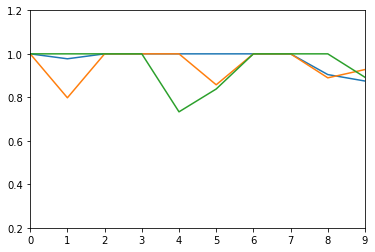


LDA has helped with classes 1, 2 , 5, 8 the most.




In [250]:
####################################################################################################
# Question 5- Repeat Q4) but use 
# Q5b) LDA projected test set (LDA parameters computed on the training set) in 2, 5, 9 dimensions. 
####################################################################################################

# LDA projected test set:

# test set
# Subset of test dataset
df_test = Xtest
# Drop columns with all zeros 0, 32 and 39
#df_test.drop([df_test.columns[0] , df_test.columns[32], df_test.columns[39]] ,  axis='columns', inplace = True)

dfB = df_test.join(pd.Series(classes, name = 'class'))

## Within Class Scatter Matrix
#### Create a vector with the means of each feature
class_feature_meansB = pd.DataFrame(columns= labels)

for c, rows in dfB.groupby('class'):
    class_feature_meansB[c] = rows.mean()
class_feature_meansB = class_feature_meansB.iloc[0:61,:]

## Plug the mean vectors (mi) into the equation to obtain the within class scatter matrix
within_class_scatter_matrixB = np.zeros((61,61))
for c, rows in dfB.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    sB = np.zeros((61,61))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(61,1), class_feature_meansB[c].values.reshape(61,1)
        sB += (x - mc).dot((x - mc).T)
    within_class_scatter_matrixB += sB
    
## Between Class Scatter Matrix
feature_meansB = dfB.mean()
feature_meansB = feature_meansB.iloc[0:61]

between_class_scatter_matrixB = np.zeros((61,61))
for c in class_feature_means:    
    n = len(dfB.loc[dfB['class'] == c].index)
    mc, m = class_feature_meansB[c].values.reshape(61,1), feature_meansB.values.reshape(61,1)
    between_class_scatter_matrixB += n * (mc - m).dot((mc - m).T)
    
### Solve the generalized eigenvalue problem to obtain the linear discriminants
eigen_valuesB, eigen_vectorsB = np.linalg.eig(np.linalg.inv(within_class_scatter_matrixB).dot(between_class_scatter_matrixB))
### Sort the eigenvalues and select the first k eigenvectors
pairs = [(np.abs(eigen_valuesB[i]), eigen_vectorsB[:,i]) for i in range(len(eigen_valuesB))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

eigen_value_sums = sum(eigen_valuesB)
## Express it as a percentage
print('Explained Variance')
for i,j in enumerate(pairs[0:9]):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigen_value_sums).real))

nine = sum(eigen_valuesB[0:8])

print("nine: ", nine, "%: ", (nine*100/eigen_value_sums).real)

## Create a matrix W with the first two eigenvectors
w_matrixB = np.hstack((pairs[0][1].reshape(61,1), pairs[1][1].reshape(61,1), pairs[2][1].reshape(61,1), 
                     pairs[3][1].reshape(61,1), pairs[4][1].reshape(61,1), pairs[5][1].reshape(61,1),
                     pairs[6][1].reshape(61,1), pairs[7][1].reshape(61,1), pairs[8][1].reshape(61,1))).real

### Save the dot product of X and W into a new matrix X_lda. 
## X_lda is composed of the LDA components,i.e. the new feature space
X_ldaB = np.array(df_test.dot(w_matrixB))

# diemnsions of PCA projection
dimension = [2, 5, 9]

# using k = 5, since it created the least error in previous question
neighbors = [5]
for j in dimension:
    dfB_train = X_lda[:, 0:j]
    
    print(dfB_train.shape)

    # Subset of test dataset
    dfB_test = X_ldaB[:, 0:j]
    print(dfB_test.shape)
    # empty list that will hold error of running KNN with a different each k
    scores = []

    for i in neighbors:
        # empty list that will hold cv scores
        cv_scores = []

        knn = KNeighborsClassifier(n_neighbors = i) 
        knn.fit(dfB_train, classes)

        y_pred = knn.predict(dfB_test)
        
        #confusion matrix
        conf = confusion_matrix(classesTest, y_pred)

        scores.append((1-metrics.accuracy_score(classesTest, y_pred))*100)
        print("k = ", i, "Dimensions = ", j, "\nConfusion Matrix:\n", conf)

        answer = (1-metrics.accuracy_score(classesTest, y_pred))*100
        print("Testing Error of KNN: ",str(round(answer, 3)), "%")

        print(classification_report(classesTest, y_pred))
        precision = precision_score(classesTest, y_pred,  average= None)
        print("Error = ", 1-precision)

        # Plot the Errors
        plt.plot(labels, 1-precision)
    
plt.axis([0, 9, 0.2, 1.2])
plt.show()

print("\nLDA has helped with classes 1, 2 , 5, 8 the most.\n\n")


In [239]:
######################################################################
# Q5c) Does using PCA or LDA help with the test error of the knn? 
# If so, for which classes does it help most? 

#Answer:
    # For the original KNN algorithm, the testing error was baout 2% 
    # while using PCA and LDA incleased this overall error.
    # At the same time, the errors for classes 2, 5, and 8 decreased 
    # when the number of dimensions increased to 9.
    # The same trend was noticed with LDA projection; classes 1, 2,4, 
    # 5, and 8 underwent lower errors.
    # Looking at the first 9 eigenvaluee in PCA, it is evident they
    # make up 67% PoV. It is not recommeneded to stop at 9 dimension.
    # Besides, for LDA this proportion is 98% at 9 dimensions
    # which means the error should be smaller than using PCA but larger
    # than the original KNN algorithm.
    # For test set, LDA projection on the first 9 dimensions has a 
    # PoV of 92%, so the results should have very small errors compared
    # to PCA projection.
######################################################################

